# Ánalise dos dados da copa do mundo
Com base na página sobre a copa do mundo na wikipedia, iremos obter dados do público pagante em cada final.
Link: https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [2]:
# Importando bibliotecas
import pandas as pd
import requests
#URL
lnk = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'
# Requisitar a página e guardar a resposta
r = requests.get(lnk)
# Obter a resposta em HTML
table = pd.read_html(r.text)
table

[                        Campeonato Mundial de Futebol  \
 0                                                 NaN   
 1                                        Dados gerais   
 2                                         Organização   
 3                                             Edições   
 4                                    Local de disputa   
 5                                             Sistema   
 6   Dados históricos  Primeiro vencedor Uruguai (1...   
 7                                    Dados históricos   
 8                                   Primeiro vencedor   
 9                                     Último vencedor   
 10                                     Maior vencedor   
 11  Estatísticas  Total de gol(o)s 2 721  Total de...   
 12                                       Estatísticas   
 13                                   Total de gol(o)s   
 14                                     Total de jogos   
 15                                              Média   
 16           

In [3]:
# Queremos apenas a tabela com os pagantes por final
# É a 12 tabela dos dados retornados
# Então o DATAFRAME será apenas a tabela 12
df = table[11]
df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500


In [4]:
# Iremos converter o campo público pagante em int
# PEGUE O PÚBLICO PAGANTE FAÇA UM REPLACE(substituição de caracteres) tirando o ponto e substituindo
# Por nada, depois converta isso para inteiro
df['Público pagante'] = df['Público pagante'].replace('', '.').astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edição           22 non-null     object 
 1   Ano              22 non-null     int64  
 2   Estádio          22 non-null     object 
 3   Local            22 non-null     object 
 4   Público pagante  22 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1008.0+ bytes


In [5]:
df['Público pagante'] = df['Público pagante'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Edição           21 non-null     object
 1   Ano              21 non-null     int64 
 2   Estádio          21 non-null     object
 3   Local            21 non-null     object
 4   Público pagante  21 non-null     int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 884.0+ bytes


In [7]:
# Vamos construir um grafico com a evolução do público pagante
#Importando novas bibliotecas para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline 

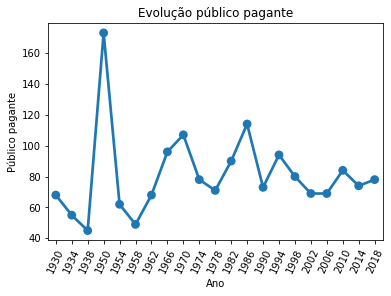

In [24]:
# Exibindo o gráfico de linhas com marcação em cada ponto 
# Usando set_title() para colocar titulos no seaborn
sns.pointplot(x='Ano' , y='Público pagante' , data=df).set_title('Evolução público pagante')
 
#Ajustando as legendas
#Utilizando matplotlib.pyplot
plt.xticks(rotation=65) #Pegue as informações do eixo x e faça uma rotação de 65° 
plt.show()

In [26]:
df.to_json('file.json')